In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Lấy địa chỉ thư mục chứa dữ liệu đã được reformatted
current_directory = os.getcwd()
folder_path = os.path.join(current_directory,'../../data/reformatted_data')

## import Original Data

In [5]:
df = pd.read_csv(f'{folder_path}/full_data.csv')
df

,student_id,course_id,subject_id,gender,age,regular_grade,absent_class_period,absenteeism_rate,midterm_grade,final_grade,overall_grade,four_point_scale,credit,batch,year
0,1900007784,100107462101,41,1,23,9.6,8,3.3,8.6,7.8,8.40,B,3,3,2022
1,2000002677,100107462101,41,0,26,9.6,8,3.3,2.9,4.9,5.24,C,3,3,2022
2,2000002924,100107462101,41,1,22,9.5,9,5.0,1.1,4.1,4.28,D,3,3,2022
3,2000003177,100107462101,41,1,23,9.3,13,6.7,6.5,5.5,6.56,C,3,3,2022
4,2000003308,100107462101,41,1,22,9.5,12,5.0,6.1,8.9,8.18,B,3,3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2200010216,100107470505,3,1,20,3.0,42,70.0,5.0,0.0,2.10,F,3,2,2022
958,2200009170,100107470505,3,1,21,9.0,4,10.0,9.0,8.0,8.50,A,3,2,2022
959,2200010939,100107470505,3,1,20,10.0,0,0.0,8.0,9.0,8.90,A,3,2,2022
960,2200000333,100107470505,3,0,21,9.0,6,10.0,10.0,8.0,8.80,A,3,2,2022


In [6]:
cv = df.iloc[:, 5: 11] # continuous variable
cv

,regular_grade,absent_class_period,absenteeism_rate,midterm_grade,final_grade,overall_grade
0,9.6,8,3.3,8.6,7.8,8.40
1,9.6,8,3.3,2.9,4.9,5.24
2,9.5,9,5.0,1.1,4.1,4.28
3,9.3,13,6.7,6.5,5.5,6.56
4,9.5,12,5.0,6.1,8.9,8.18
...,...,...,...,...,...,...
957,3.0,42,70.0,5.0,0.0,2.10
958,9.0,4,10.0,9.0,8.0,8.50
959,10.0,0,0.0,8.0,9.0,8.90
960,9.0,6,10.0,10.0,8.0,8.80


## Giả định rằng: "Sinh viên nghỉ học và không làm bài tập nhiều sẽ ảnh hưởng đến điểm giữa kỳ và điểm cuối kỳ, điểm tổng kết.

### Kiểm tra sự ảnh hưởng của điểm thường xuyên đối với điểm giữa kỳ, điểm cuối kỳ, điểm tổng kết bằng phân tích tương quan.

In [7]:
# Tìm mối quan hệ giữa điểm thường xuyên với điểm tổng kết.
cov3 = cv.loc[:, ['regular_grade', 'overall_grade']].cov()
corr3 = cv.loc[:, ['regular_grade', 'overall_grade']].corr() # -1 < corr(x,y) < 1
print(cov3)
print(corr3)

               regular_grade  overall_grade
regular_grade       1.501819       0.781937
overall_grade       0.781937       2.450856
               regular_grade  overall_grade
regular_grade       1.000000       0.407572
overall_grade       0.407572       1.000000


#### Nhận xét 1: 

Ta thấy, hiệp phương sai và hệ số tương quan của ‘regular_grade’ và ‘overall_grade’ > 0. Điều này, cho thấy điểm thường xuyên và điểm tổng kết có mối quan hệ đồng biến. Khi điểm thường xuyên tăng, điểm tổng kết cũng tăng, nhưng với hệ số tương quan  bằng 0.4 lớn hơn -1 và bé hơn 1, cho biết mức độ tăng trung bình trong mối quan hệ cả 2 biến. Trong quan hệ thuận yếu, khi x tăng, y có thể tăng, nhưng do một lý do nào khác.


In [8]:
# Tìm mối quan hệ giữa điểm thường xuyên với điểm giữa kỳ theo ma trận hiệp phương sai, hệ số tương quan pearson.
cov1 = cv.loc[:, ['regular_grade', 'midterm_grade']].cov()
corr1 = cv.loc[:, ['regular_grade', 'midterm_grade']].corr() # -1 < corr(x,y) < 1
print(cov1)
print(corr1)

               regular_grade  midterm_grade
regular_grade       1.501819       0.281904
midterm_grade       0.281904       9.118906
               regular_grade  midterm_grade
regular_grade       1.000000       0.076177
midterm_grade       0.076177       1.000000


#### Nhận xét 2:
+ Hiệp phương sai của 2 đặc trưng có giá trị ~ 0.3 > 0, cho thấy 2 giá trị này đang có mối quan hệ đồng biến, điểm thường xuyên tăng, điểm giữa kỳ cũng tăng.
+ Hệ số tương quan của điểm thường xuyên với điểm giữa kỳ ~ 0.07 cho thấy:
  
  + Có mối quan hệ đồng biến giữa 2 đặc trưng này, nhưng giá trị của hệ số tương quan này lại khá xa so với 0
#### Kết luận: Điểm thường xuyên tăng, thì điểm giữa kỳ tăng theo mức độ yếu.


In [9]:
# Tìm mối quan hệ giữa điểm thường xuyên với điểm cuối kỳ.
cov2 = cv.loc[:, ['regular_grade', 'final_grade']].cov()
corr2 = cv.loc[:, ['regular_grade', 'final_grade']].corr() # -1 < corr(x,y) < 1
print(cov2)
print(corr2)

               regular_grade  final_grade
regular_grade       1.501819     0.794046
final_grade         0.794046     3.812778
               regular_grade  final_grade
regular_grade        1.00000      0.33183
final_grade          0.33183      1.00000


#### Nhận xét 3:
+ Hiệp phương sai của 2 đặc trưng có giá trị ~ 0.8 > 0, cho thấy 2 giá trị này đang có mối quan hệ đồng biến, điểm thường xuyên tăng, điểm giữa kỳ cũng tăng.
+ Hệ số tương quan của điểm thường xuyên với điểm giữa kỳ ~ 0.3 cho thấy:
  
  + Có mối quan hệ đồng biến giữa 2 đặc trưng này, nhưng giá trị của hệ số tương quan này lại khá xa so với 0
#### Kết luận: Điểm thường xuyên tăng, thì điểm giữa kỳ tăng theo mức độ yếu. Nhưng mức độ tăng này lại cao hơn nhiều so với điểm giữa kỳ.


In [10]:
# Tính phương sai của mỗi đặc trưng.
print('The variance of regular_grade: ', cv['regular_grade'].var())
print('The variance of midterm_grade: ', cv['midterm_grade'].var())
print('The variance of final_grade: ', cv['final_grade'].var())
print('The variance of overall_grade: ', cv['overall_grade'].var())

The variance of regular_grade:  1.5018189212986297
The variance of midterm_grade:  9.118905584015906
The variance of final_grade:  3.8127784856817124
The variance of overall_grade:  2.4508560664242247


#### Nhận xét 4: Phương sai của điểm giữa kỳ có giá trị cao nhất => điểm giữa kỳ có độ phân tán cao nhất.

In [11]:
""" Từ nhận xét 1, 2, 3: có thể kết luận ràng giả định:
"Do overall_grade được tính từ re,mid,final nên khi overall_ grade và regular_grade có mối quan hệ đồng biến thì khi quy nạp nó, chúng ta cũng => mỗi quan hệ giữa re với mid, final cũng sẽ có mối quan hệ đồng biến."  là chính xác
Vì vậy khi nói về mối quan hệ giữa nghỉ học nhiều (regular_grade) với điểm số, ta chỉ cần xét regular_grade vói overall_grade """

' Từ nhận xét 1, 2, 3: có thể kết luận ràng giả định:\n"Do overall_grade được tính từ re,mid,final nên khi overall_ grade và regular_grade có mối quan hệ đồng biến thì khi quy nạp nó, chúng ta cũng => mỗi quan hệ giữa re với mid, final cũng sẽ có mối quan hệ đồng biến."  là chính xác\nVì vậy khi nói về mối quan hệ giữa nghỉ học nhiều (regular_grade) với điểm số, ta chỉ cần xét regular_grade vói overall_grade '

## Phân tích đơn biến.

In [12]:
df = pd.read_csv(f'{folder_path}/EDA.csv')
df

,Unnamed: 0,student_id,gender,age,gpa1,gpa2,gpa3,gpa4,ar1,ar2,ar3,ar4,drop_out
0,0,1900006098,1,23,1.3,3.4,1.3,2.4,34.5,12.0,0.0,53.0,1
1,1,1900007549,0,23,3.3,0.4,3.1,2.7,100.0,48.0,76.0,90.0,1
2,2,1900007763,1,23,7.0,6.1,3.8,3.5,0.0,18.1,2.3,17.2,0
3,3,1900007784,1,23,9.2,9.4,6.9,7.5,15.0,2.2,16.1,8.9,0
4,4,1900008106,1,23,4.7,7.7,3.1,7.2,7.7,0.0,19.1,7.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,320,2200011621,1,20,5.4,2.7,4.8,5.3,14.4,40.0,17.9,12.3,0
321,321,2200011643,1,23,3.8,8.0,7.8,6.4,16.8,0.0,3.7,0.0,0
322,322,2200011704,1,20,9.3,7.3,7.7,5.4,10.8,10.0,0.4,15.8,0
323,323,2200011866,0,21,6.2,4.7,6.4,8.3,4.0,11.5,14.5,0.0,0


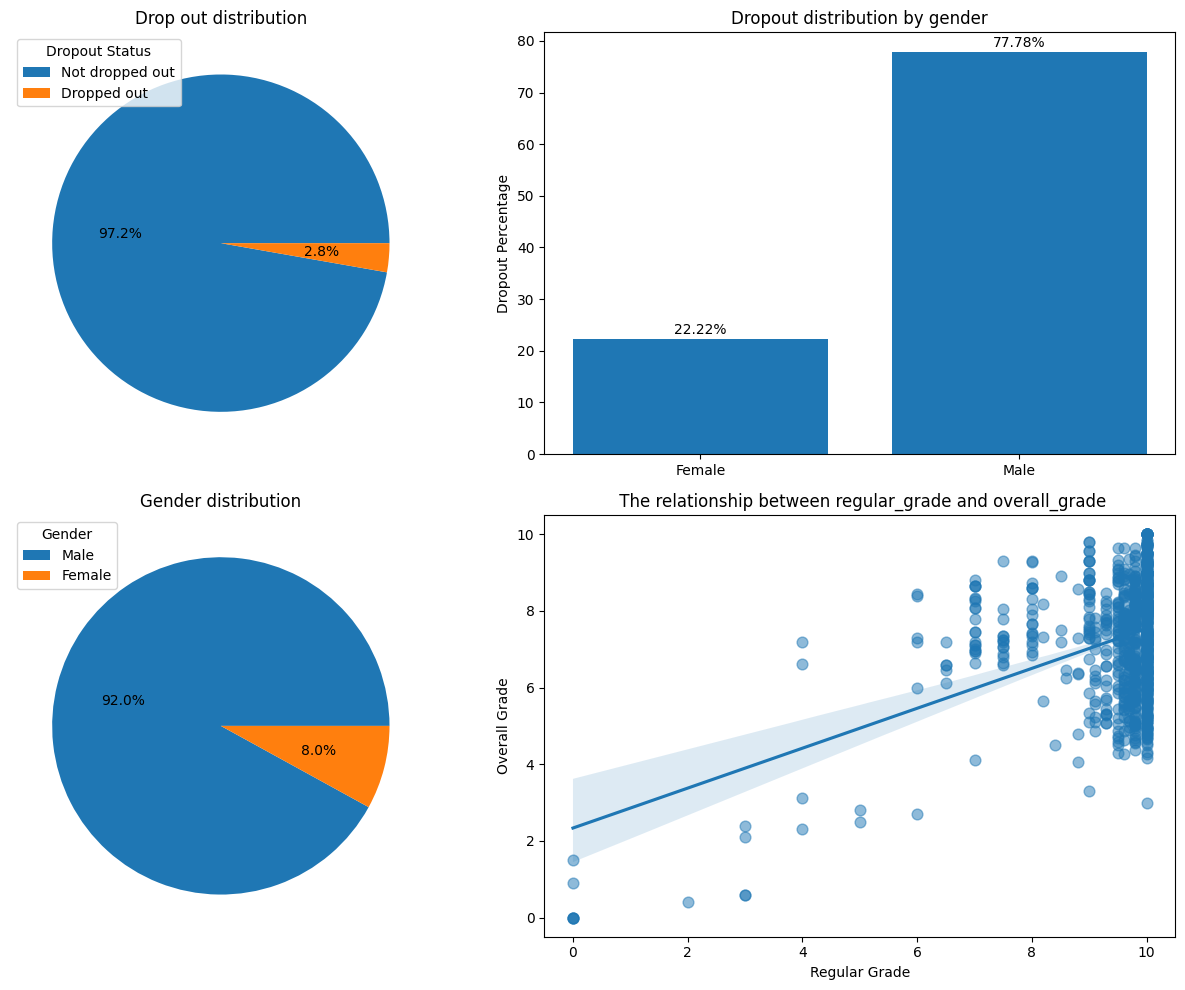

In [13]:
fig = plt.figure(figsize=(13,10))
ax1 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,1)
ax4 = fig.add_subplot(2,2,4)

""" Trực quan hóa số lượng nam và nữ"""
# Số lượng nam, nữ
gender_counts = df['gender'].value_counts(normalize=True)
# Tỉ lệ nam
male_percentage  = gender_counts[1]
female_percentage = 1 - male_percentage
# Biểu đồ cột tỉ lệ nam nữ.
ax1.pie([male_percentage, female_percentage], labels=None, autopct='%1.1f%%')
ax1.legend(['Male','Female'], title='Gender', loc='upper left')
ax1.set_title('Gender distribution')



""" Trực quan hóa số lượng nam và nữ"""
# Tỉ lệ bị thôi học và chưa thôi học.
drop_out = df['drop_out'].value_counts(normalize=True)
drop_out0 = drop_out[0]
drop_out1 = 1 - drop_out0
# Tỉ lệ sinh viên nam nữ bị thôi học.
m_cond = (df['drop_out'] == 1) & (df['gender'] == 1)
f_cond = (df['drop_out'] == 1) & (df['gender'] == 0)
male_dropped_out_student = round((df[m_cond].shape[0] / df[df['drop_out']==1].shape[0]) * 100,2)
female_dropped_out_student = round((df[f_cond].shape[0] / df[df['drop_out']==1].shape[0]) * 100,2)
ax3.bar(['Female', 'Male'], [female_dropped_out_student, male_dropped_out_student])
for i, value in enumerate([female_dropped_out_student, male_dropped_out_student]):
    ax3.text(i, value + 1, f'{value}%', ha='center')
ax3.set_ylabel('Dropout Percentage')
ax3.set_title('Dropout distribution by gender')


ax2.pie([drop_out0, drop_out1], autopct='%1.1f%%', labels=None)
ax2.legend(['Not dropped out','Dropped out'],title='Dropout Status', loc='upper left')
ax2.set_title('Drop out distribution')


# Vẽ biểu đồ phân tán với đường hồi quy.
sns.regplot(x='regular_grade', y='overall_grade', data=cv, ax=ax4, scatter_kws={'alpha': 0.5, 's': 60})
ax4.set_title(' The relationship between regular_grade and overall_grade')
ax4.set_xlabel('Regular Grade')
ax4.set_ylabel('Overall Grade')

plt.tight_layout()
plt.show()

In [17]:
from scipy import stats
contingency_table = pd.crosstab(df['gender'], df['drop_out'])
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

print(f"Thống kê Chi-square: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Có sự khác biệt có ý nghĩa về tỉ lệ thôi học giữa nam và nữ.")
else:
    print("Không có sự khác biệt có ý nghĩa về tỉ lệ thôi học giữa nam và nữ.")

Thống kê Chi-square: 0.9446
P-value: 0.3311
Không có sự khác biệt có ý nghĩa về tỉ lệ thôi học giữa nam và nữ.


# Nhận xét biểu đồ về tình trạng học tập của sinh viên:
+ Tỉ lệ sinh viên thôi học rất thấp so với tỉ lệ sinh viên còn học, với số lượng sinh viên thôi học tập trung chủ yếu ở giới tính nam. (chưa kiểm định)
+ 'Regular_grade' và 'overall_grade' có mối quan hệ đồng biến, khi điểm thường xuyên tăng, thì điểm tổng kết cũng tăng (tăng ở mức độ khá, coeificient ~ 0,4). Ngoài ra, biểu đồ 4 còn cho thấy sinh viên có điểm thấp có số lượng rất ít (đã kiểm định bằng phương pháp phân tích tương quan)


# Thực hiện kiểm định:

+ Giả định 1: Sinh viên thôi học có tỉ lệ rất thấp.
+ Giả định 2: Tỉ lệ thôi học của sinh viên nam nhiều hơn sinh viên nữ.

## Thực hiện kiểm định giả định 1.

In [15]:
# Tỉ lệ sinh viên thôi học.
print('Tỉ lệ sinh viên thôi học', round(drop_out0 * 100, 2), '%')
print('Tỉ lệ sinh viên còn học', round(drop_out1 * 100, 2), '%')

Tỉ lệ sinh viên thôi học 97.23 %
Tỉ lệ sinh viên còn học 2.77 %


In [16]:
import math as m
# Áp dụng kiểm định one-proportion z-test.
""" Giả thuyết H0: tỉ lệ mẫu bằng với kỳ vọng. (giả thuyết vô hiệu)
    Giả thuyết H1: tỉ lệ mẫu khác biệt với kỳ vọng. (giả thuyết thay thế.) """

p = drop_out1
p0 = 0.05 # tỉ lệ kì vọng.
numerator = p - p0 # Mẫu số
denominator = m.sqrt((p0*(1-p0)) / df.shape[0])

z = numerator/denominator

alpha = 0.05 # Mức ý nghĩa.

# Tính giá trị z-critical.
z_critical = 




SyntaxError: invalid syntax (4189797531.py, line 16)